## 0. Importing Libraries and Load Test Data

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [2]:
df=pd.read_csv('test_data.csv')

In [3]:
df

,gal4,uas,gal4>uas
0,0.358733,-0.300109,-1.183746
1,0.418430,-1.059580,0.868309
2,1.599382,0.042198,-0.781333
3,-0.663706,0.173899,1.016846
4,-1.494022,0.142610,1.357660
5,-0.082484,-1.271498,-0.525542
6,-0.239332,-1.798411,-0.728544
7,-1.835269,0.539703,0.666914
8,-0.293048,-1.970972,-0.585522
9,0.402435,-0.872043,-0.879560


## 1. Towards publication-ready plots

### 1.1 Seaborn

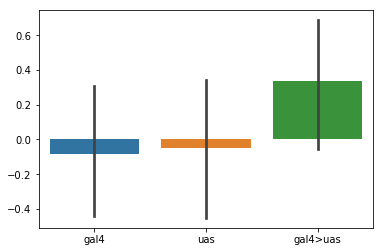

In [4]:
sns.barplot(data=df)

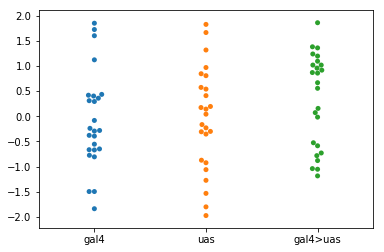

In [4]:
sns.swarmplot(data=df)

While easy to use, the default settings produce a plot with very small font (and an ugly background), which is generally unusable for academic publications.

We can use seaborn's `set` command to easily control figure aesthetics.

In [7]:
sns.set(context='poster',font_scale=1.5,style='ticks')

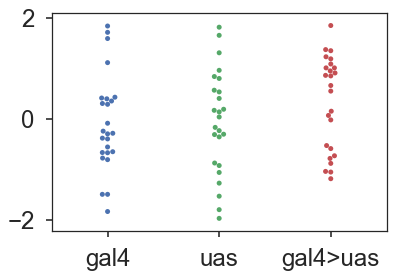

In [6]:
sns.swarmplot(data=df)

From the `seaborn` documentation:

_The base context is "notebook", and the other contexts are "paper", "talk", and "poster", which are version of the notebook parameters scaled by 0.8, 1.3, and 1.6, respectively. `font scale` is a separate scaling factor to independently scale the size of the font elements._

The `set` command will modify the aesthetic settings for all subsequent plots. To reset it to the default, just run ```sns.set()```.

Note that the above plot, with enlarged font, is easier to view. We can use options found in the `swarmplot` command to tweak the marker size as well.

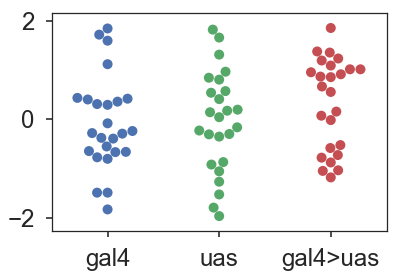

In [7]:
sns.swarmplot(data=df,size=10)

In seaborn, you can dictate the colors applied to each group (in alphabetical order) using the `palette` flag.

You can get a list of builtin `matplotlib` colors here:
https://matplotlib.org/examples/color/named_colors.html

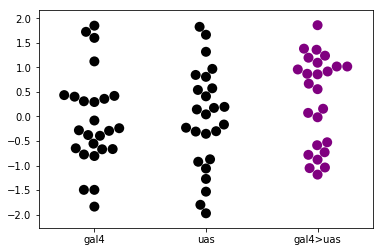

In [6]:
sns.swarmplot(data=df,size=10,
             palette=['black','black','purple'])

You can also use one of `matplotlib`'s or `seaborn`'s colormaps.

See http://matplotlib.org/examples/color/colormaps_reference.html and http://seaborn.pydata.org/tutorial/color_palettes.html

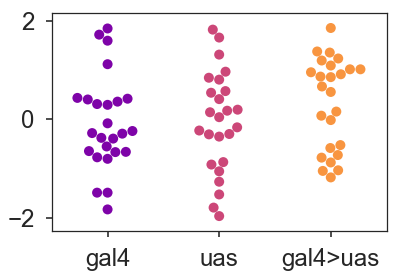

In [14]:
sns.swarmplot(data=df,size=10,
             palette='plasma')

Seaborn also has a special command named `despine`. It will remove the box around the plot area.

To use this command, you need to create a `AxesSubplot`, plot on it, and explicity give the name of the `AxesSubplot` to `despine`.


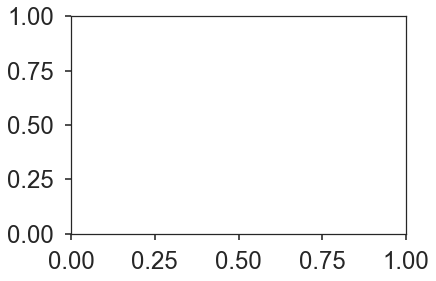

In [8]:
f,a=plt.subplots(1)

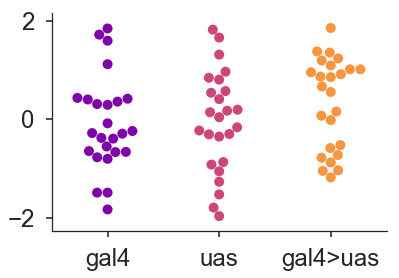

In [10]:
f,a=plt.subplots(1)
sns.swarmplot(data=df,size=10,palette='plasma',ax=a)

sns.despine(ax=a)

The `despine` command also has a `trim` option that (as suggested by the name) shrinks the axes to the leftmost and rightmost ticks (for both the x and y axes). This produces a Tufte-esque plot with elegant use of negative space.

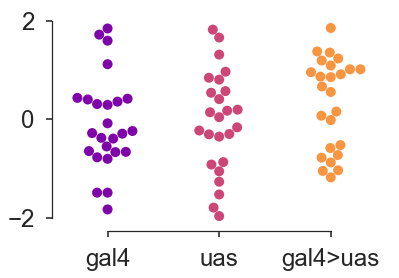

In [11]:
sns.despine(ax=a, trim=True)
f

Extra tip—you can use the `offset` flag in the `despine` command to move the axes further away or nearer (negative numbers) from the plot area.

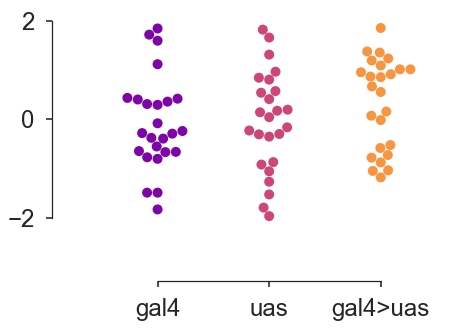

In [17]:
sns.despine(ax=a,offset=50,trim=True)
f

Because `seaborn` is built on `matplotlib`, we can use basic `matplotlib` functions to add a title to the main plot, and to the axes.

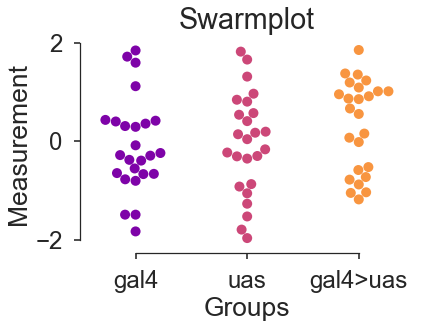

In [18]:
sns.despine(ax=a,offset=0,trim=True)
# Note that I _did not_ create a new AxesSubplot, I simply replotted over on the previously created one.
a.set_title('Swarmplot')
a.set_ylabel('Measurement')
a.set_xlabel('Groups')
f

In [ ]:
## Saving the figure.
plt.rcParams['svg.fonttype']='none' # You only need to run this line once. It ensures that all text is exported as text (not as a path) during svg export,.
plt.rcParams['pdf.fonttype']=42    # This as well, if you want to save as a PDF.
f.savefig('swarmplot.svg', transparent=True, frameon=False) # The `transparent` flag sets the background as transparent; while `frameon` controls if the rectangular plot patch is on.

#### 1.1a Pro-tip: Adjust swarmplot ylims __before__ plotting

To be able to change the ylims, we need to create an `SubplotAxes` object, upon which we will create a swarmplot.

(-5, 5)

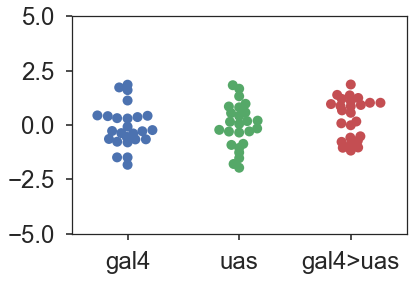

In [20]:
f,a=plt.subplots(1)
sns.swarmplot(data=df,ax=a,size=10)
a.set_ylim(-5,5)

Compare the above, with below.

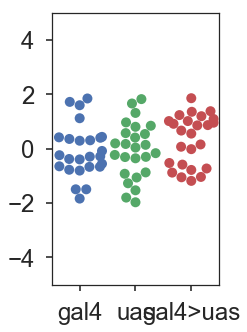

In [15]:
f,a=plt.subplots(1,figsize=(3,5))
a.set_ylim(-5,5)
sns.swarmplot(data=df,ax=a,size=10)

Why is this so?

From the seaborn `swarmplot` documentation
http://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot: 

_...arranging the points properly requires an accurate transformation between data and point coordinates. This means that non-default axis limits should be set before drawing the swarm plot._

### 1.2 Pandas

`pandas` itself has powerful plotting functions built-in, all using `matplotlib`.

See this long but helpful tutorial.
https://pandas.pydata.org/pandas-docs/stable/visualization.html

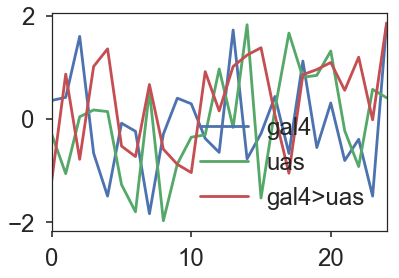

In [34]:
df.plot() # Each pandas DataFrame has a `plot` function.

To control the legend, you can either turn it off...

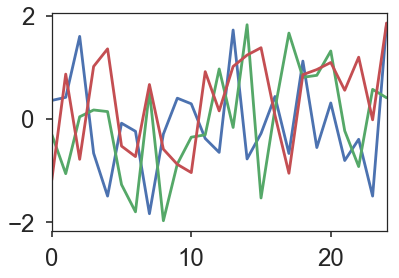

In [35]:
df.plot(legend=False)

...or you can set its position manually

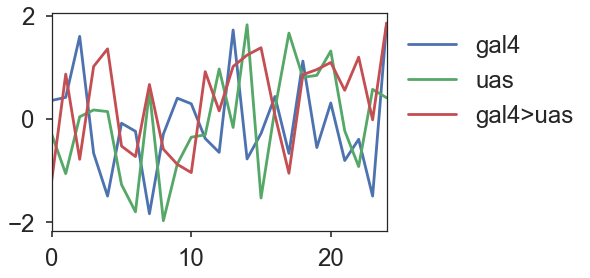

In [44]:
ax=df.plot()
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
# `loc` tells the legend() function which corner to use as reference,
# `bbox_to_anchor` tells it where to position the reference corner, in axes fraction xy coordinates.
# the origin of the axes (where the x-axis and y-axis meet) is denoted as (0,0).

In [17]:
ax_arr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a59fba8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a78a7f0>], dtype=object)

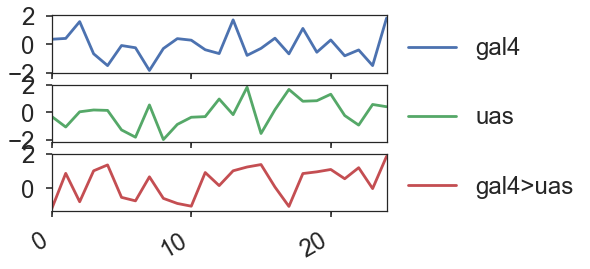

In [18]:
ax_arr=df.plot(subplots=True) # with the 'subplots' flag, you can give each group its own subplot axes.
# To adjust the legend, you need to loop through each axes and set the legend location.
for ax in ax_arr:
    ax.legend(loc='upper left',bbox_to_anchor=(1,1))

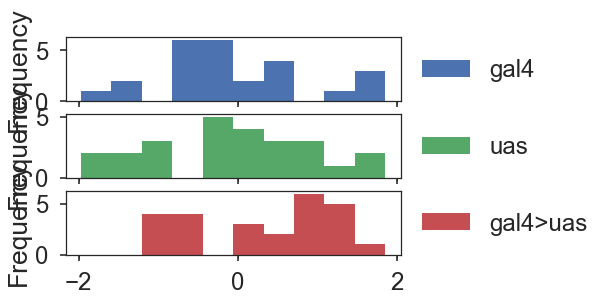

In [47]:
ax_arr=df.plot.hist(subplots=True) # Instead of a line plot, make a histogram plot for each group.
for ax in ax_arr:
    ax.legend(loc='upper left',bbox_to_anchor=(1,1))

## 2. Multiple Axes on A Single Figure, Or How You Actually Don't Need Illustrator

### 2.1 Creating subplots
There are several ways in matplotlib to create a figure consisting of several axes subplots. 

Personally, I've found the method below to be the most useful, requiring me to layout all the axes first before plotting my desired data appropriately.

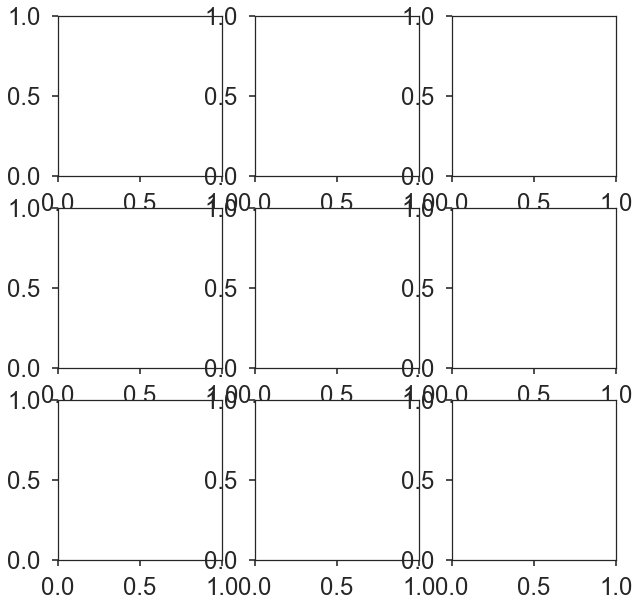

In [20]:
f,ax=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
# The `figsize` option allows you to set the dimensions of the figure in inches.

`plt.subplots` returns a `Figure` and an array of `Axes` objects. Different functions apply to either the `Figure`, while others apply to individual `Axes` objects.

Firstly, the above figure is not pretty because we've requested a larger font scale, so the axes tick labels overlap.  Fortunately, there is a useful function `tight_layout` that applies to the __`figure`__ object.

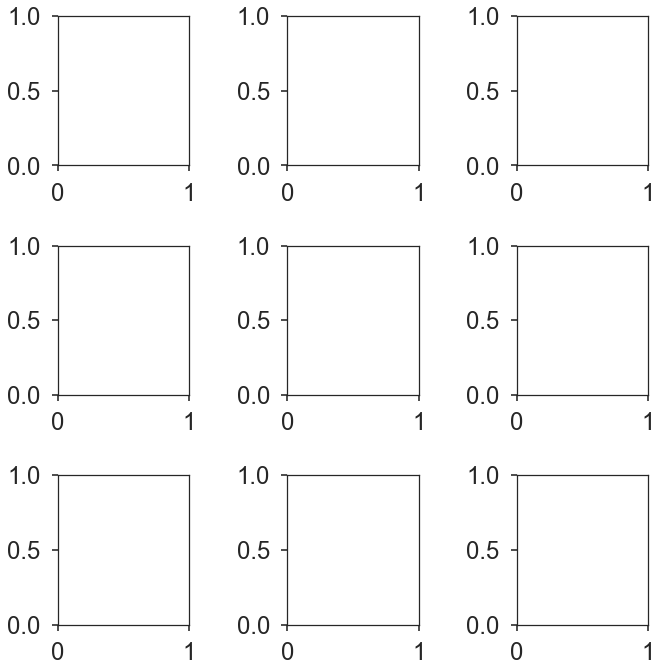

In [51]:
f.tight_layout()
f

Normally, you run the `tight_layout()` method on a `Figure` after you have completed all your plotting and aesthetic tweaks, right before you save it.

Another way is to create a dictionary with `hspace` and `wspace` variables, and pass it to the function via the `gridspec_kw` option.

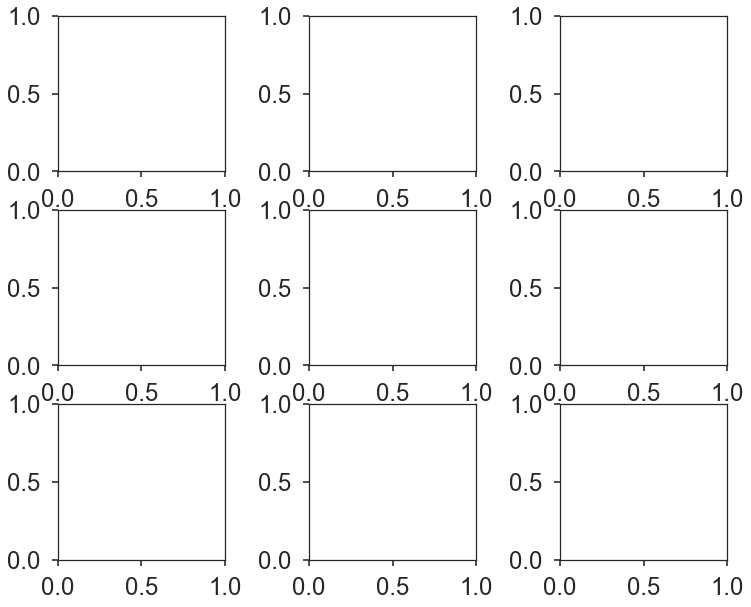

In [22]:
f,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10),
                  gridspec_kw=dict(hspace=0.25,wspace=0.5) )

# hspace and wspace are the amount of height/width reserved for white space between subplots,
# expressed as a fraction of the average subplot height/width.

# Note that `gridspec_kw` requires a Python dictionary as input. More on this later.

### 2.2 Accessing individual axes

Using `plt.subplots` to create an `ndarray` of `AxesSubplot` objects allows you to access individual axes of choice by using NumPy array methods.

For beginners, note that in Python (and in most programming languages), when you access an array or list, the _first_ index is **0**, not 1. 

In [26]:
sns.set(style='ticks')

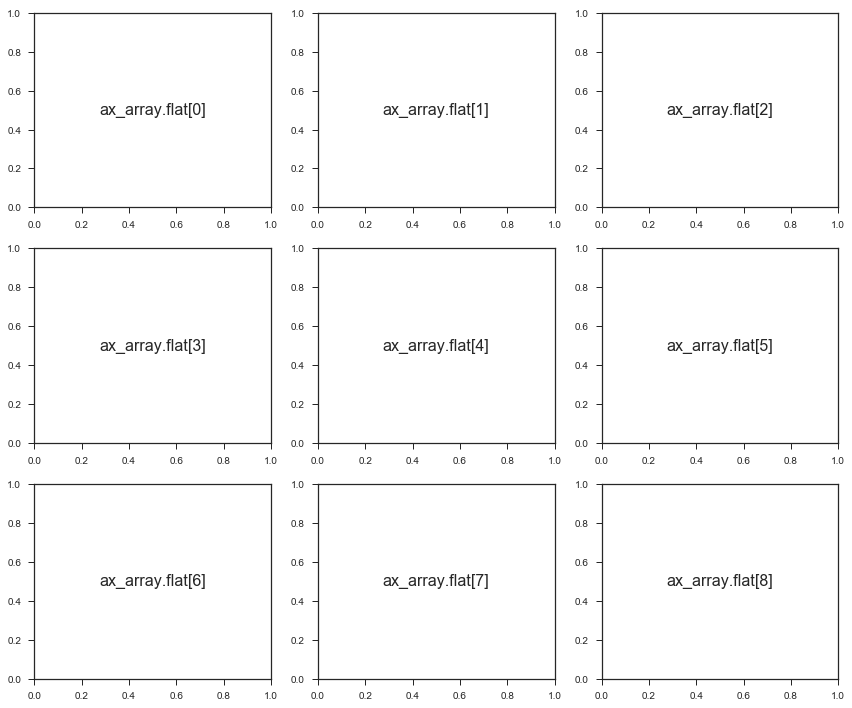

In [32]:
f,ax_array=plt.subplots(nrows=3,ncols=3,figsize=(12,10),)
for j in range(0,len(ax_array.flat)): 
    # `ax.flat` gives an flattened array, so I can
    # iterate through each axes through one loop.
    # See https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.ndarray.flat.html#numpy.ndarray.flat
    # for more details.
    
    ax_array.flat[j].annotate(s='ax_array.flat['+str(j)+']', # the text to annotate. 's' stands for string.
                                xy=(0.5,0.5), # xy coordinates...
                                xycoords='axes fraction', #  ...as a fraction of the axes.
                                fontsize=16, # the fontsize of the annotated text.
                                va="center", ha="center" # vertical and horizontal alignment, respectively.
                   )
f.tight_layout()

Instead of using `ax.flat`, we can also access the axes directly using the xy grid coordinates.

In [30]:
## PROTIP: USING DICTIONARIES TO SAVE ON TYPING, AND FOR CLEANER, NICER-LOOKING CODE
text_annotation_args={'xy':(0.5,0.5), 
                      'xycoords':'axes fraction',
                      'fontsize':16, 'va':"center", 'ha':"center"}
# You can pass this dictionary of keyword arguments to ANY FUNCTION like so:
# some_function(data=my_data, **text_annotation_args)

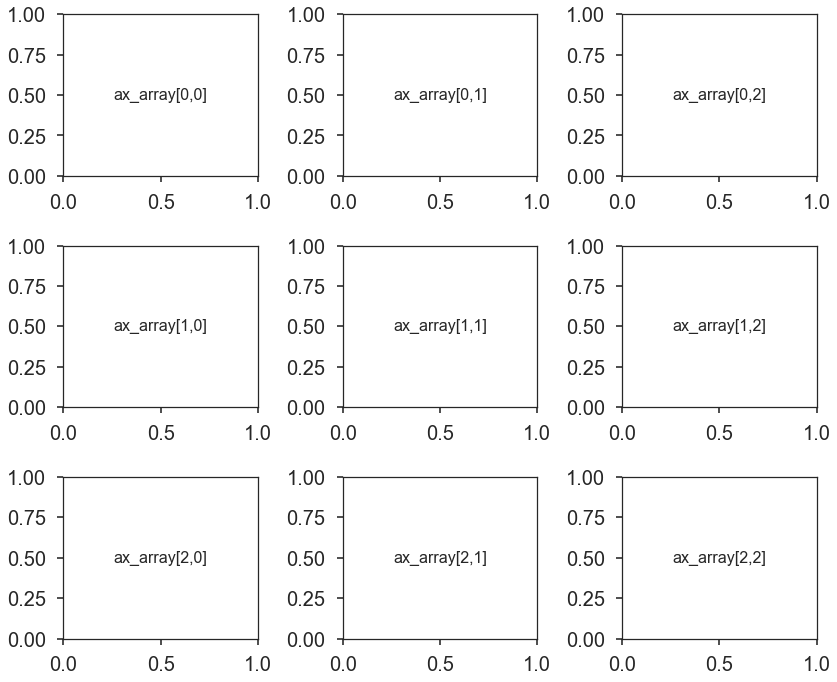

In [82]:
f,ax_array=plt.subplots(nrows=3,ncols=3,figsize=(12,10),)
rowcount,colcount=np.shape(ax_array) # np.shape gives the dimensions of the array.

for j in range(0, np.size(ax_array)): # np.size gives the total number of elements in the array.
    # Calculate the row and column coordinate of the axes.
    r=j//colcount # integer division.
    c=np.mod(j,colcount) # get remainder of division.
    
    ax_array[r,c].annotate(s="ax_array["+str(r)+','+str(c)+']',
                       **text_annotation_args
                      )
f.tight_layout()

This chunk of code will annotate a two-dimensional array of `AxesSubplot` objects automatically, __regardless__ of the layout. 

Try changing the `nrows` and `ncols` arguments in the `plt.subplots` command in the first line of the cell below.

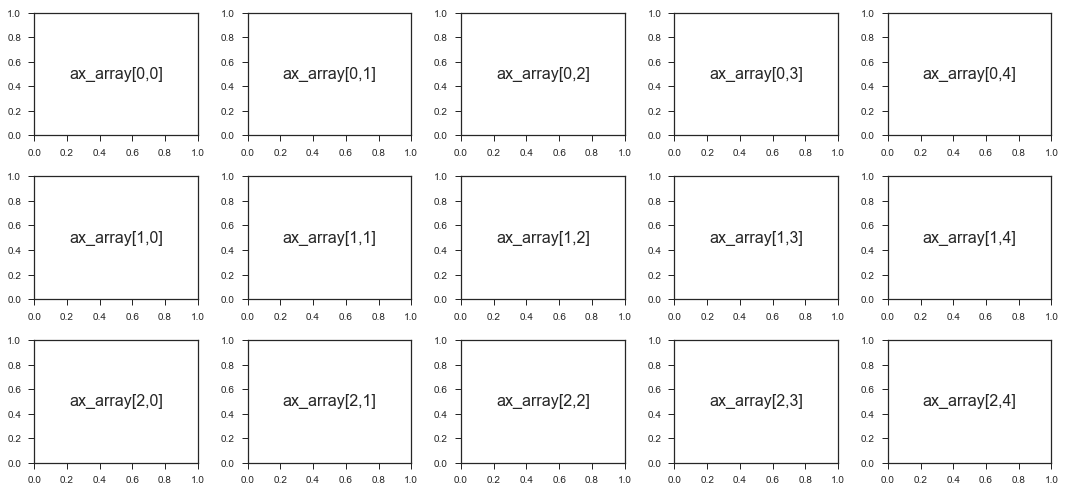

In [31]:
f,ax_array=plt.subplots(nrows=3,ncols=5,figsize=(15,7))
rowcount,colcount=np.shape(ax_array) # np.shape gives the dimensions of the array.

for j in range(0, np.size(ax_array)): # np.size gives the total number of elements in the array.
    
    # Calculate the row and column coordinate of the axes.
    r=j//colcount # integer division.
    c=np.mod(j,colcount) # get remainder of division.
    
    ax_array[r,c].annotate(s="ax_array["+str(r)+','+str(c)+']', # the text to annotate.
                 **text_annotation_args
                   )
f.tight_layout()

### 2.3 Plotting on any desired `Axes`: Putting it all together

Let's use the `ax.flat` method to access an `Axes` of our choosing, and then plotting a swarmplot on it.

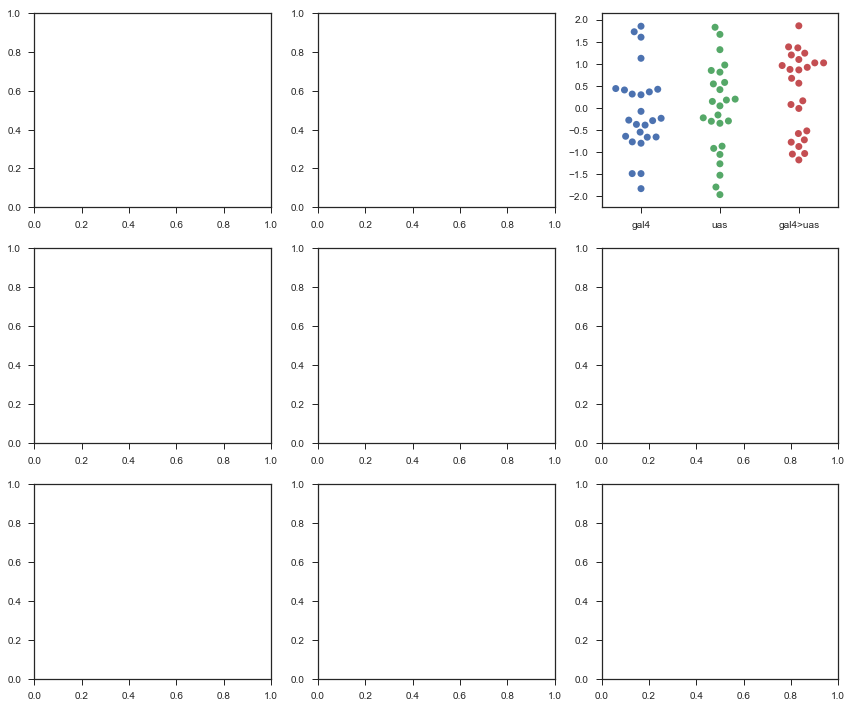

In [33]:
f,ax_array=plt.subplots(nrows=3,ncols=3,figsize=(12,10)) # create array of AxesSubplot objects.
sns.swarmplot(data=df,ax=ax_array.flat[2],size=7) # plot a swarmplot on desired axes.
f.tight_layout() # aesthetic touch.

And let's make a barplot below that.

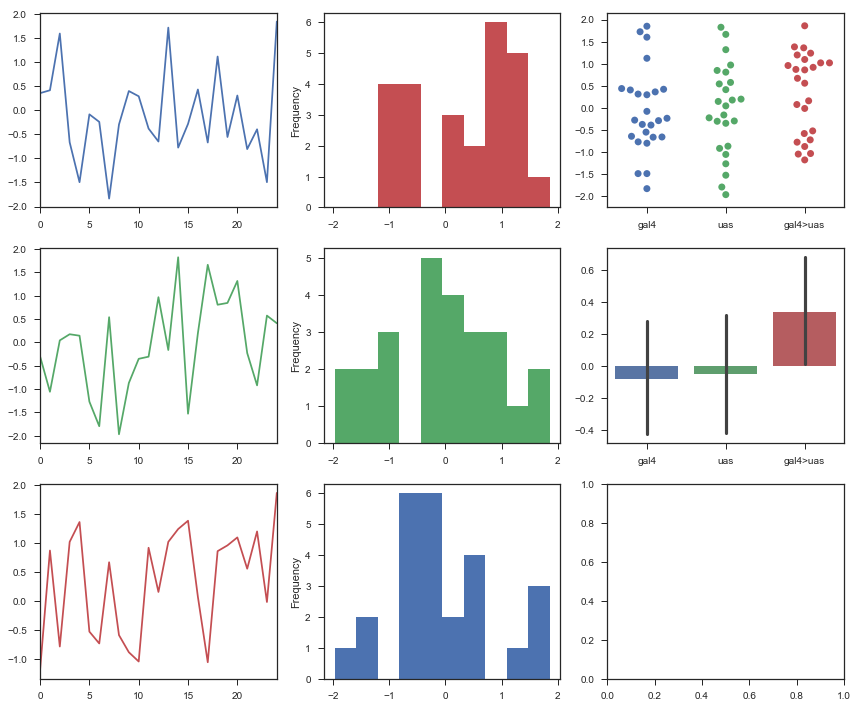

In [37]:
sns.barplot(data=df,ax=ax_array.flat[5],ci=95)
f

The built-in `pandas DataFrame.plot` function allows us to pass a list of axes for it to plot over by using the `subplots` argument.


This is also an example where using accessing the `ndarray` array directly to plot has benefits  over the `ndarray.flat` method.



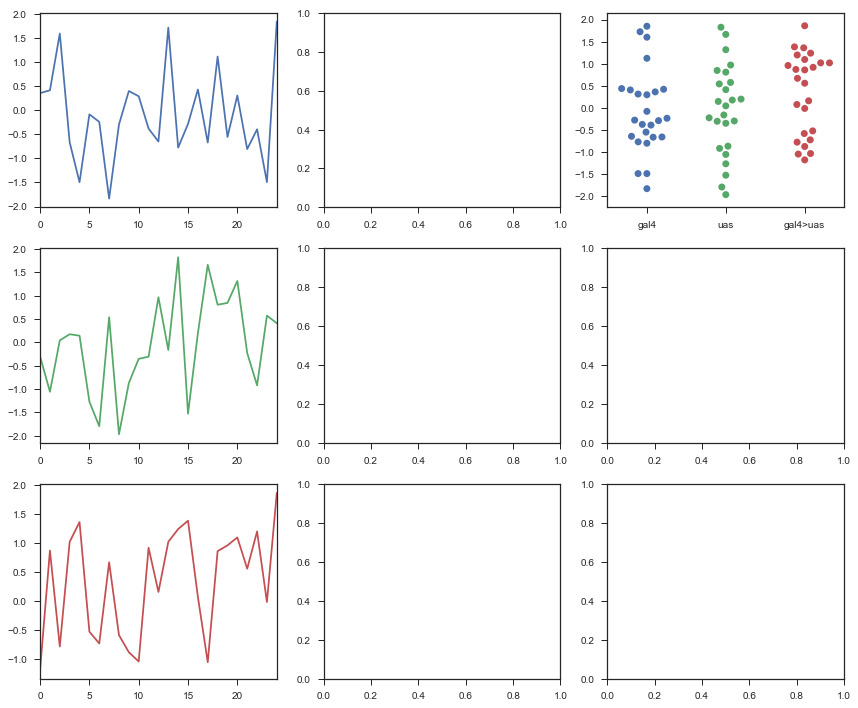

In [34]:
df.plot(subplots=True,ax=ax_array[:,0],legend=False) # using pandas builtin plotting function.
f

By comparison, let's use the `ndarray.flat` method again to plot histograms in the middle column.

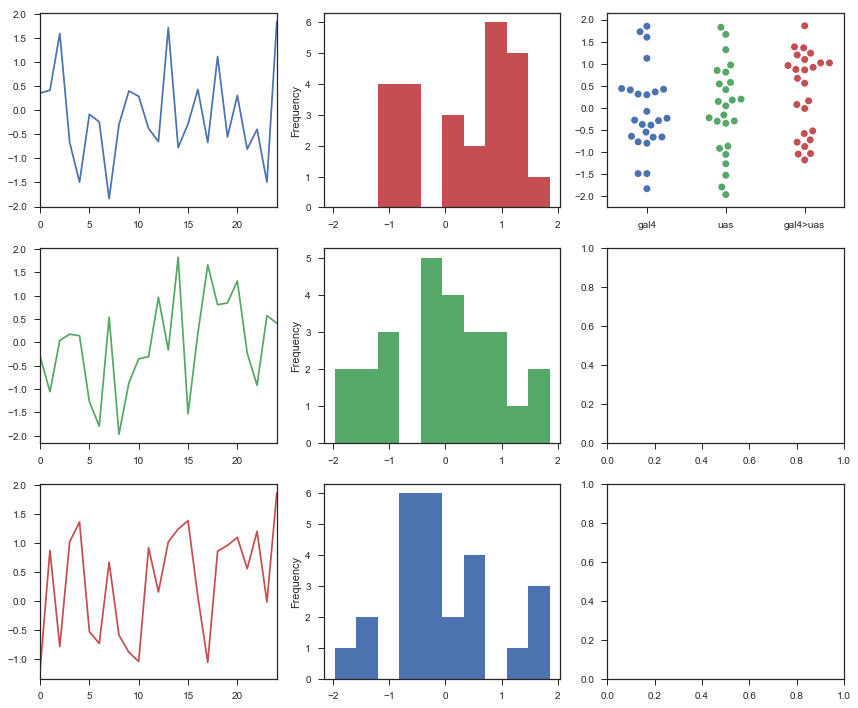

In [36]:
df.plot.hist(subplots=True,ax=ax_array.flat[[7,4,1]],legend=False)
f

A `matplotlib` `AxesSubplot` object can be turned invisible by accessing its `axis` method and entering 'off'.

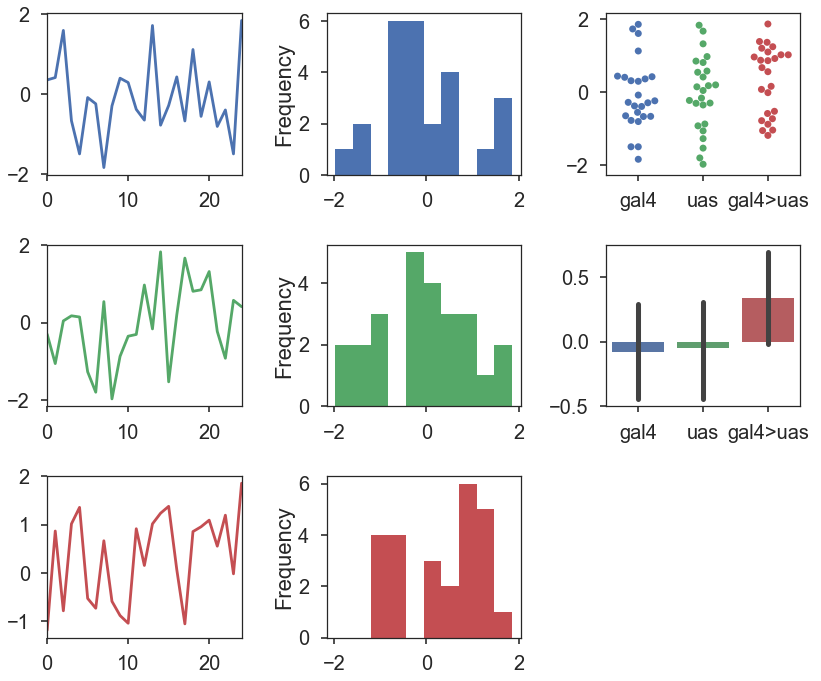

In [87]:
ax_array.flat[8].axis('off')
f

### 2.4 Putting it all together

#### 2.4.1 Create a dictionary to place panel labels.

In [39]:
from string import ascii_uppercase as johnny
johnny

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [40]:
label_dict=dict( zip(range(0,26), johnny) )
# Use the zip command to sequentially associate two lists,
# then convert the zip object to a dictionary for easy referencing.
label_dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

#### 2.4.2 Create the plot.

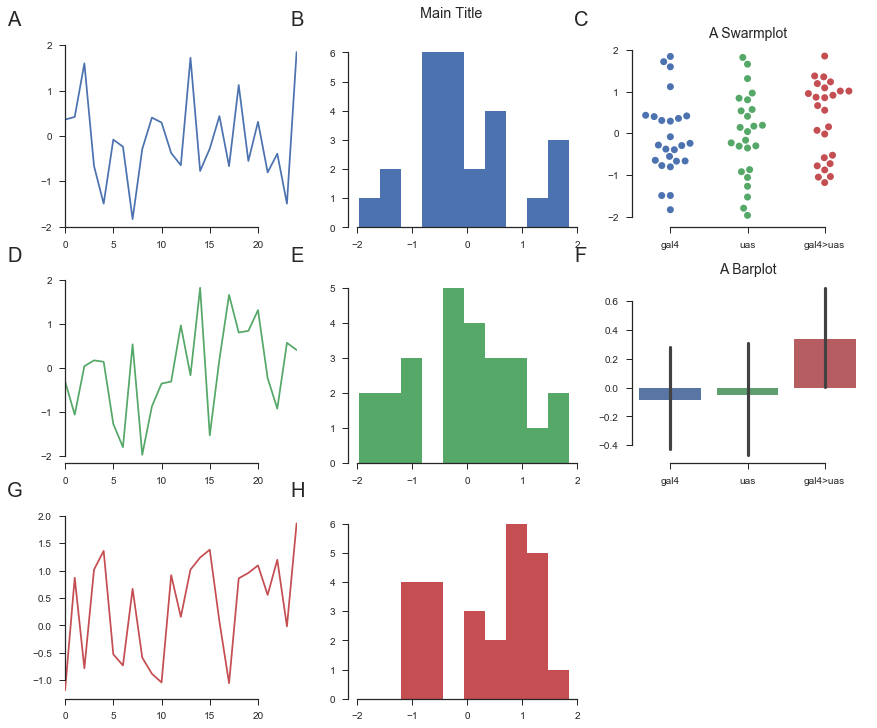

In [43]:
f,ax_array=plt.subplots(nrows=3,ncols=3,figsize=(12,10)) # create array of AxesSubplot objects.

sns.swarmplot(data=df,ax=ax_array.flat[2],size=7) # plot a swarmplot on desired axes.
sns.barplot(data=df,ax=ax_array.flat[5]) # Plot the barplot below the swarmplot. 
df.plot(subplots=True,ax=ax_array[:,0],legend=False) # Plot lineplots on the first column.
df.plot.hist(subplots=True,ax=ax_array.flat[[1,4,7]],legend=False) # plot histograms on the second column.

f.suptitle('Main Title',y=1.01)
ax_array.flat[2].set_title('A Swarmplot',fontsize=14)
ax_array.flat[5].set_title('A Barplot',fontsize=14)

for a in ax_array.flat[[1,4,7]]:
    a.set_ylabel('')

for j, a in enumerate(ax_array.flat[:-1]): 
    # in Python array notation, 
    # array[:-1] indicates:
    # "Take all elements in the array EXCEPT the last one."
    a.annotate(xy=(-0.25,1.1), # Again, these are expressed in axes fraction coordinates.
               s=str( label_dict[j] ),
               xycoords='axes fraction',
               fontsize=20,
#                fontweight='bold',
               clip_on=False,)
    sns.despine(ax=a,trim=True)

ax_array.flat[8].axis('off')

f.tight_layout()

## 3. More complex layouts

### 3.1 Fun with GridSpec

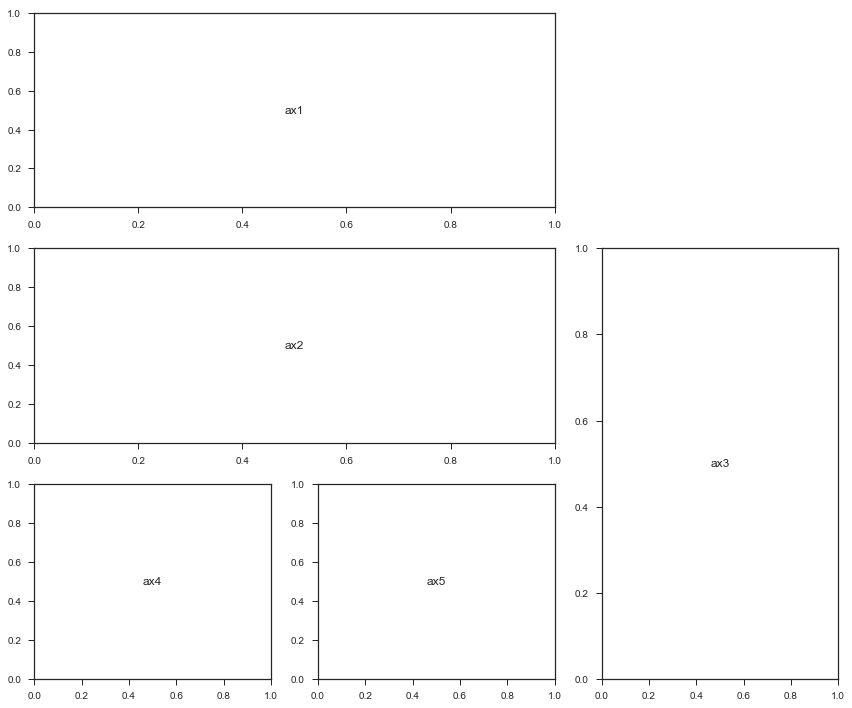

In [45]:
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(12,10))

gs=gridspec.GridSpec(ncols=3,nrows=3) # a 3X3 grid.
ax1=fig.add_subplot(gs[0,:2]) # ax1 takes up entire 1st row.
ax2=fig.add_subplot(gs[1,:2]) # ax2 is on the 2nd row, up till the 2nd column.
ax3=fig.add_subplot(gs[1:,2]) # ax3 takes up the 2nd and 3rd rows, on the 3rd column.
ax4=fig.add_subplot(gs[2, 0]) # ax4 is on the 3rd row, 1st column.
ax5=fig.add_subplot(gs[2, 1]) # ax5 is on the 3rd row, 2nd column.

for i, ax in enumerate(plt.gcf().axes): # plt.gcf() accesses the most recently created figure.
        ax.text(0.5, 0.5, "ax"+str(i+1), va="center", ha="center")
        
plt.tight_layout()

## 4. Miscellaneous Tips

### 4.1 Annotating with rectangles

Often, in behavioral experiments, a certain stimulus will be presented to the animal for a period of time. Here, I show how to indicate the period of stimulus by drawing a solid rectangle onto an `AxesSubplot`. 

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:1694: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ac778d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b5cd128>], dtype=object)

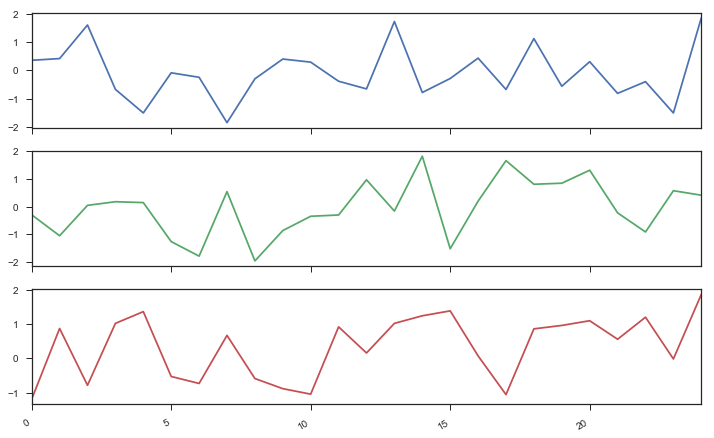

In [59]:
f,ax_array=plt.subplots(nrows=3,figsize=(12,8)) 
df.plot(subplots=True,ax=ax_array,legend=False,sharey=True,sharex=True) 

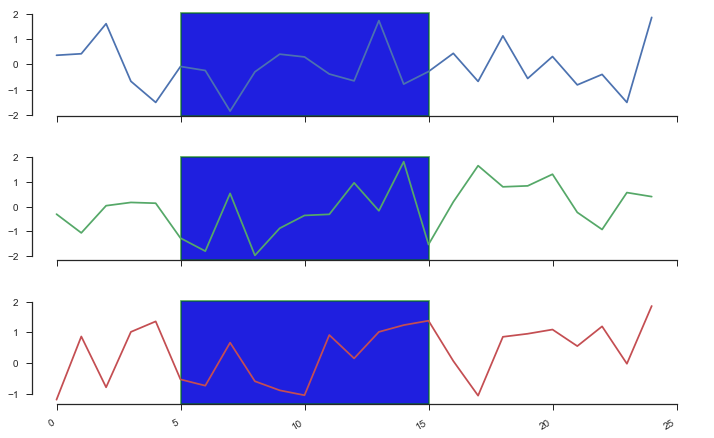

In [54]:
hspan_args={'facecolor':'blue','edgecolor':'green','linewidth':2,'clip_on':False}
# facecolor and edgecolor are the fill and outline colors of the rectangle.
# clip_on basically allows you to plot an object outside of the typical axes boundaries.

for a in ax_array:
    a.set_xlim(-1,26) 
    a.axvspan(xmin=5,xmax=15, # the x-coordinates of the rectangle start and end, in DATA COORDS.
              ymin=0,ymax=1.,
              alpha=0.5,# the y-coordinates of the rectangle bottom and top, in AXES FRACTION COORDS.
              **hspan_args)
    sns.despine(ax=a,trim=True)

f

The `axvhspan`, like most functions in `matplotlib`, has an `alpha` parameter. An `alpha` of 1 indicates a fully opaque object, while an `alpha` of 0 is a totally transparent (aka invisible) object.

We can take advantage of a loop to sequentially vary the alpha given to `axvspan`, so as to create a set of rectangles with graded transparency. Such a technique could be used to illustrate stimuli of varying strength.

In [56]:
subplot_args=dict(nrows=3,figsize=(12,8),gridspec_kw=dict(hspace=0.4))

hspan_args={'facecolor':'black','edgecolor':'black','clip_on':False,
            'xmin':5,'xmax':15,
            'ymin':1,'ymax':1.05,
           }

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:1694: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


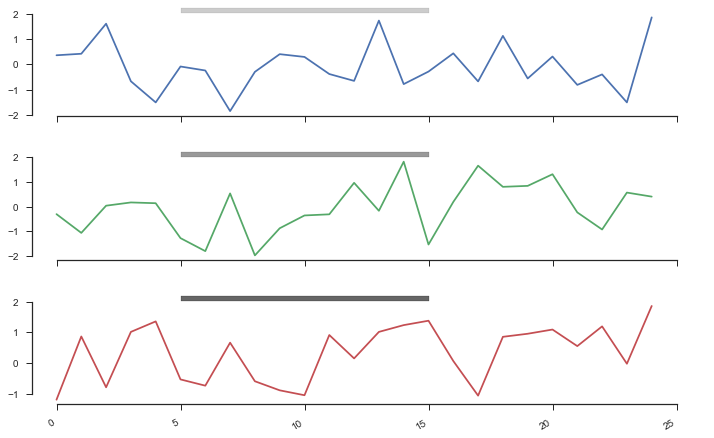

In [57]:
f,ax_array=plt.subplots(**subplot_args) 
df.plot(subplots=True,ax=ax_array,legend=False,sharex=True)

for j, a in enumerate(ax_array):
    a.set_xlim(-1,26) # To make space for lowest plot.
    a.axvspan(alpha=( (j+1)*0.2 ),
              **hspan_args)
    sns.despine(ax=a,trim=True)
    

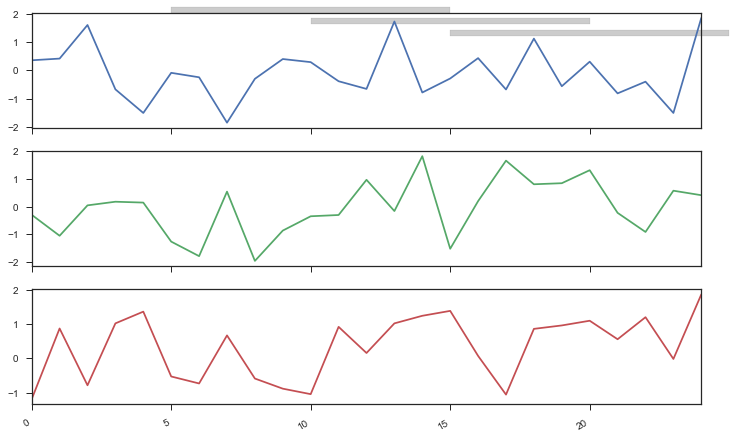

In [60]:
# staggered stimuli

for j, t in enumerate([5,10,15]):
    ypos=j*0.1
    ax_array[0].axvspan(alpha=0.2,
                        facecolor='black',edgecolor='black',clip_on=False,
                        xmin=t,xmax=t+10,
                        ymin=1-ypos,ymax=1.05-ypos,
                       )
    sns.despine(ax=a,trim=True)
f

In [ ]:
ax_arr[2].ipynb_checkpoints/

## Notes

In [ ]:
## How the dummy test data was generated:
# np.random.seed(4891) # Ensures we generate the exact same psuedo-random numbers all the time.
# gal4=np.random.normal(size=25)
# uas=np.random.normal(size=25)*1.1
# offspring=np.random.normal(size=25)+0.1
# df=pd.DataFrame([gal4,uas,offspring]).T
# df.columns=['gal4','uas','gal4>uas']